<h2 align="center" style="color:blue">ML: Handling Class Imbalance</h2>

**Dataset credits** UCI Machine Learning Datasets

Downloaded from here: https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset

In [55]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 


In [56]:
df = pd.read_csv("churn.csv")
df.head()


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [57]:
df.Churn.value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

<Axes: xlabel='Churn'>

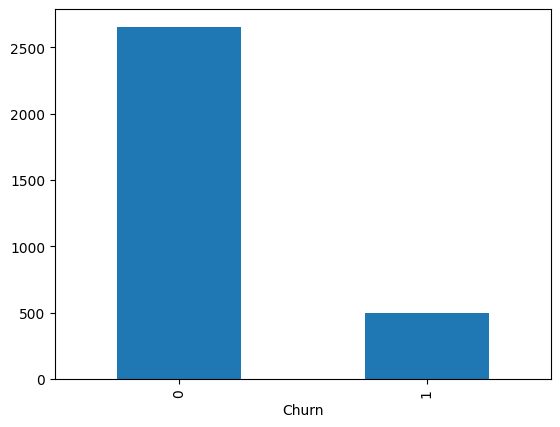

In [58]:
df.Churn.value_counts().plot(kind="bar")

In [59]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [60]:
X = df.drop("Churn", axis=1)   # all features except target
y = df["Churn"]                # target variable

#will train a logistic regression model,
logistic regression is used for classification problems 


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train Logistic Regression
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       531
           1       0.84      0.41      0.55        99

    accuracy                           0.90       630
   macro avg       0.87      0.70      0.75       630
weighted avg       0.89      0.90      0.88       630



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
y_train.value_counts()

Churn
0    2124
1     396
Name: count, dtype: int64

In [63]:
#First we will try with undersampling technique
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42)
X_train_rus,y_train_rus = rus.fit_resample(X_train,y_train)
y_train_rus.value_counts()

Churn
0    396
1    396
Name: count, dtype: int64

In [64]:
model = LogisticRegression(max_iter= 2000)
model.fit(X_train_rus,y_train_rus)

y_pred_rus = model.predict(X_test)
report = classification_report(y_test,y_pred_rus)
print(report) 

              precision    recall  f1-score   support

           0       0.96      0.80      0.88       531
           1       0.44      0.84      0.58        99

    accuracy                           0.81       630
   macro avg       0.70      0.82      0.73       630
weighted avg       0.88      0.81      0.83       630



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Why recall improved because better representation of minorty class during the training phase 

In [65]:
# 1) check packages + basic imports
import sys
print("Python:", sys.version)

# Check imbalanced-learn
try:
    import imblearn
    print("imbalanced-learn:", imblearn.__version__)
except Exception as e:
    print("imbalanced-learn not installed or import failed:", e)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Python: 3.13.1 (v3.13.1:06714517797, Dec  3 2024, 14:00:22) [Clang 15.0.0 (clang-1500.3.9.4)]
imbalanced-learn: 0.14.0


In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_smote,y_train_smote  = smote.fit_resample(X_train,y_train)
y_train_smote.value_counts()

Churn
0    2124
1    2124
Name: count, dtype: int64

In [67]:
model = LogisticRegression(max_iter= 2000)
model.fit(X_train_smote,y_train_smote)

y_pred_smote = model.predict(X_test)
report = classification_report(y_test,y_pred_smote)
print(report) 

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       531
           1       0.44      0.85      0.58        99

    accuracy                           0.81       630
   macro avg       0.70      0.82      0.73       630
weighted avg       0.88      0.81      0.83       630



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
# SMOTE + Tomek Links
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_tomek, y_train_tomek = smote_tomek.fit_resample(X_train, y_train)

print("Class distribution after SMOTE + Tomek Links:")
print(pd.Series(y_train_tomek).value_counts())

Class distribution after SMOTE + Tomek Links:
Churn
0    2091
1    2091
Name: count, dtype: int64


In [71]:
model = LogisticRegression(max_iter= 2000)
model.fit(X_train_tomek,y_train_tomek)

y_pred_tomek = model.predict(X_test)
report = classification_report(y_test,y_pred_tomek)
print(report) 

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       531
           1       0.44      0.85      0.58        99

    accuracy                           0.81       630
   macro avg       0.71      0.83      0.73       630
weighted avg       0.88      0.81      0.83       630



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
